In [1]:
# import stuff based on the provided assignments

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import pandas as pd
from pyfinance.options import BSM
from mpl_toolkits.mplot3d import Axes3D
from datar import f
from datar.dplyr import mutate, filter, if_else, pull, group_by, select

[2021-11-27 09:40:01][datar][WARNING] Builtin name "filter" has been overriden by datar.


In [3]:
# Read given file from data folder in same working directory

xls = pd.ExcelFile('data/isx2010C.xls')
print('All sheets in the file')
sheets = xls.sheet_names
sheets

sheet_order = [0,1,11,10,9,8,7,6,5,4,3,2]


All sheets in the file


In [4]:
# ordering for the sheets

sheet_order = [0,1,11,10,9,8,7,6,5,4,3,2]
for i in sheet_order:
    print(sheets[i])
    day = sheets[i][3:5]
    month = sheets[i][5:7]
    year = sheets[i][7:11]
    print(day, month, year)
    print()

isx15012010C
15 01 2010

isx19022010C
19 02 2010

isx19032010C
19 03 2010

isx16042010C
16 04 2010

isx21052010C
21 05 2010

isx18062010C
18 06 2010

isx16072010C
16 07 2010

isx20082010C
20 08 2010

isx17092010C
17 09 2010

isx15102010C
15 10 2010

isx19112010C
19 11 2010

isx17122010C
17 12 2010



In [5]:
df_1 = pd.read_excel(xls, sheets[0])
df_1

,2009-09-21 00:00:00,340,345,350,355,360,365,370,375,380,...,540,545,550,555,560,565,570,Unnamed: 48,Unnamed: 49,date
,<int64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,...,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<object>
0,86,152.20,NaN,NaN,NaN,132.60,NaN,NaN,NaN,113.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491.34,0.11,21.9.2009
1,85,155.05,NaN,NaN,NaN,135.35,NaN,NaN,NaN,115.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494.35,0.11,22.9.2009
2,84,152.40,NaN,NaN,NaN,132.70,NaN,NaN,NaN,113.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.36,0.11,23.9.2009
3,83,147.00,NaN,NaN,NaN,127.25,NaN,NaN,NaN,108.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.99,0.11,24.9.2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,82,145.55,NaN,NaN,NaN,125.95,NaN,NaN,NaN,106.75,...,3.80,NaN,NaN,NaN,1525.00,NaN,NaN,484.11,0.11,25.9.2009
81,5,185.50,180.50,175.50,170.50,165.50,160.50,155.50,150.50,145.50,...,0.10,0.07,0.05,0.05,0.05,0.05,0.05,524.29,0.06,12.1.2010
82,4,188.55,183.55,178.55,173.55,168.55,163.55,158.55,153.55,148.55,...,0.15,0.07,0.05,0.05,0.05,0.15,0.15,527.93,0.06,13.1.2010
83,3,190.10,185.10,180.10,175.10,170.10,165.10,160.10,155.10,150.10,...,0.05,0.05,0.02,0.05,0.05,0.15,0.05,529.59,0.06,14.1.2010


In [6]:
# Read data and melt into useable format

df_1 = pd.read_excel(xls, sheets[0])
df_1.rename({df_1.columns[0]:'T','Unnamed: 48': 'S', 'Unnamed: 49': 'r'}, axis='columns', inplace=True)
df_1.drop(['date'],axis=1,inplace=True)
df_1 = df_1.melt(id_vars=['T', 'r', 'S'], var_name="E").dropna()
df_1.rename({'value':'Cobs'}, axis='columns', inplace=True)
df_start = df_1  >> mutate(r = f.r/100, Mat = f.T, T = f.T/252, S = f.S/1000, E = f.E/1000, Cobs = f.Cobs/1000)
df_start

,T,r,S,E,Cobs,Mat
,<float64>,<float64>,<float64>,<object>,<float64>,<int64>
0,0.341270,0.0011,0.49134,0.34,0.15220,86
1,0.337302,0.0011,0.49435,0.34,0.15505,85
2,0.333333,0.0011,0.49036,0.34,0.15240,84
3,0.329365,0.0011,0.48699,0.34,0.14700,83
...,...,...,...,...,...,...
4,0.325397,0.0011,0.48411,0.34,0.14555,82
4036,0.023810,0.0006,0.52861,0.57,0.00005,6
4037,0.019841,0.0006,0.52429,0.57,0.00005,5
4038,0.015873,0.0006,0.52793,0.57,0.00015,4


Here `T` refers to days until maturity, `S` refers to stock prices and `Cobs` to call prices, `E` for strikes and `r` for risk-free interest rates.

In [7]:
# calculate IV, BS delta and vega for the options

def iv(row):
    S=row['S']
    E=row['E']
    r=row['r']
    T=row['T']
    Cobs=row['Cobs']
    
    starting_vol = .2
    bsm = BSM(S, E, T, r, starting_vol)
    return bsm.implied_vol(Cobs, precision=1.0e-3)

def delta(row):
    S=row['S']
    E=row['E']
    r=row['r']
    T=row['T']
    Cobs=row['Cobs']
    iv = row['iv']
    
    bsm = BSM(S, E, T, r, iv)
    return bsm.delta()

def vega(row):
    S=row['S']
    E=row['E']
    r=row['r']
    T=row['T']
    Cobs=row['Cobs']
    iv = row['iv']
    
    bsm = BSM(S, E, T, r, iv)
    return bsm.vega()

df_data = df_start.copy()
df_data['iv'] = df_data.apply(iv,axis=1)
df_data = df_data >> filter(0 < f.iv < 0.6)

df_data['delta'] = df_data.apply(delta, axis=1)
df_data['vega'] = df_data.apply(vega, axis=1)

/home/juuso/Documents/school/finaeng1/venv/lib/python3.9/site-packages/pyfinance/options.py:242: RuntimeWarning: divide by zero encountered in double_scalars
  vol = vol + diff / opt.vega()
/home/juuso/Documents/school/finaeng1/venv/lib/python3.9/site-packages/pyfinance/options.py:149: RuntimeWarning: invalid value encountered in double_scalars
  self.d1 = (
/home/juuso/Documents/school/finaeng1/venv/lib/python3.9/site-packages/pyfinance/options.py:151: RuntimeWarning: overflow encountered in double_scalars
  + (self.r + 0.5 * self.sigma ** 2) * self.T


In [8]:
# function that given data, option strike and hedging frequency
# will delta hedge option portfolio by taking
# delta * stock price short position
# returns array of squared errors between option and stock portfolio
# and how many observations there were

def hedge(p_o, p_s, cobs, S, delta):
    option_gain = cobs - p_o
    stock_gain = -delta * (S - p_s['price'])
    error = option_gain + stock_gain
    
    return cobs, {'price':S, 'delta':delta}, error**2
    
def simulate_portfolio(strike, frequency):
    n = 0
    p_o = df_data[df_data['E'] == strike].iloc[0]['Cobs']
    p_s = {
        'price':df_data[df_data['E'] == strike].iloc[0]['S'],
        'delta':df_data[df_data['E'] == strike].iloc[0]['delta']
    }
    error_arr = np.array([])

    for index, data in df_data[df_data['E'] == strike].reset_index(drop=True).iterrows():
        T,r,S,E,cobs,mat,iv,delta,vega = data

        if n == freq:
            p_o, p_s, error = hedge(p_o, p_s, cobs, S, delta)
            error_arr = np.append(error_arr, error)
            n = 0
        n += 1
    return error_arr, len(df_data[df_data['E'] == strike])

In [9]:
# try hedging with all strikes and frequency from
# min freq to max freq

min_freq = 1
max_freq = 5

obs = {
    'strike':[],
    'freq':[],
    'mse':[],
    'n':[]
}
for strike in df_data['E'].unique():
    for freq in range(min_freq,max_freq):
        error, count = simulate_portfolio(strike, freq)
        obs['strike'].append(strike)
        obs['freq'].append(freq)
        obs['mse'].append(error.mean())
        obs['n'].append(count)
        
hedge_data = pd.DataFrame(obs)
print(df_data[['iv','delta','vega']].to_markdown())

|      |          iv |        delta |         vega |
|-----:|------------:|-------------:|-------------:|
|    0 | 0.339673    | 0.974804     | 0.0168859    |
|    1 | 0.33882     | 0.977379     | 0.0154269    |
|    2 | 0.391285    | 0.958679     | 0.0250484    |
|    3 | 0.293105    | 0.986866     | 0.00943928   |
|    4 | 0.361896    | 0.965367     | 0.0211545    |
|    5 | 0.362625    | 0.97121      | 0.0183299    |
|    6 | 0.315657    | 0.984167     | 0.0109575    |
|    7 | 0.370174    | 0.968008     | 0.0196211    |
|    8 | 0.379997    | 0.955989     | 0.024693     |
|    9 | 0.361289    | 0.962546     | 0.0214678    |
|   10 | 0.351782    | 0.971434     | 0.0172836    |
|   11 | 0.287244    | 0.991569     | 0.00611383   |
|   12 | 0.350319    | 0.978296     | 0.0137725    |
|   13 | 0.402465    | 0.965754     | 0.0201243    |
|   14 | 0.382307    | 0.973982     | 0.0159942    |
|   15 | 0.350304    | 0.983942     | 0.0106062    |
|   16 | 0.345743    | 0.984975     | 0.009922

In [156]:
hedge_data

,strike,freq,mse,n
,<float64>,<int64>,<float64>,<int64>
0,0.340,1,5.876369e-07,53
1,0.340,2,6.958838e-07,53
2,0.340,3,3.835669e-07,53
3,0.340,4,5.806040e-07,53
...,...,...,...,...
4,0.345,1,1.881889e-07,8
183,0.565,4,1.222778e-08,40
184,0.570,1,1.014087e-08,64
185,0.570,2,1.795081e-08,64


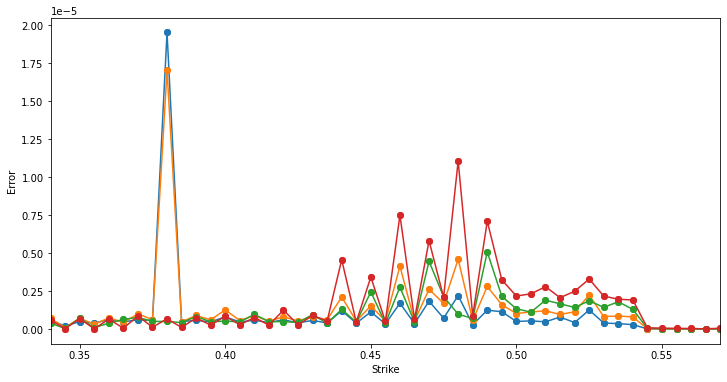

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))

for strike in hedge_data['freq'].unique():
    used = hedge_data[hedge_data['freq'] == strike][['strike','freq', 'mse']].reset_index(drop=True)
    
    #ax.scatter(used['strike'], used['freq'], s=used['mse']*1000000*15)
    ax.scatter(used['strike'], used['mse'])
    ax.plot(used['strike'], used['mse'], '-o')
    

#plt.ylim(0,1e-5)
plt.xlim(0.34,0.57)
plt.xlabel('Strike')
plt.ylabel('Error')
plt.show()

In [195]:
"""function for testing frequencies and different strikes for all worksheets"""

def read_data(xls,worksheet):
    return pd.read_excel(xls, worksheet)
    

def format_data(df):
    """Convert into correct format"""
    df.rename(dict(zip(np.append(np.array(df.columns[0]), df.columns[-3:]), ['T', 'S', 'r', 'date'])), axis='columns', inplace=True)
    df.drop(['date'],axis=1,inplace=True)
    df = df.melt(id_vars=['T', 'r', 'S'], var_name="E").dropna()
    df.rename({'value':'Cobs'}, axis='columns', inplace=True)
    df = df  >> mutate(r = f.r/100, Mat = f.T, T = f.T/252, S = f.S/1000, E = f.E/1000, Cobs = f.Cobs/1000)
    return df
    
def calculate_bs_greeks(row):
    """Calculate IV and using that as volatility find delta and vega"""
    S=row['S']
    E=row['E']
    r=row['r']
    T=row['T']
    Cobs=row['Cobs']
    
    starting_vol = .2
    bsm = BSM(S, E, T, r, starting_vol)
    iv = bsm.implied_vol(Cobs, precision=1.0e-3)
    
    bsm_iv = BSM(S, E, T, r, iv)
    
    delta = bsm_iv.delta()
    vega = bsm_iv.vega()
    
    return iv, delta, vega
    
def simulate_portfolio(df_data, strike, frequency):
    """
    Simulate portfolio of long 1 call, short delta*stock
    with given strike and rebalancing frequency.
    Returns array of errors, average stock price for data and how many observations there were
    """
    n = 0
    p_o = df_data[df_data['E'] == strike].iloc[0]['Cobs']
    p_s = {
        'price':df_data[df_data['E'] == strike].iloc[0]['S'],
        'delta':df_data[df_data['E'] == strike].iloc[0]['delta']
    }
    error_arr = np.array([])

    for index, data in df_data[df_data['E'] == strike].reset_index(drop=True).iterrows():
        T,r,S,E,cobs,mat,iv,delta,vega = data

        if n == frequency:
            p_o, p_s, error = hedge(p_o, p_s, cobs, S, delta)
            error_arr = np.append(error_arr, error)
            n = 0
        n += 1
    return error_arr, df_data[df_data['E'] == strike]['S'].mean(),len(df_data[df_data['E'] == strike])

def hedge(p_o, p_s, cobs, S, delta):
    option_gain = cobs - p_o
    stock_gain = -delta * (S - p_s['price'])
    error = option_gain + stock_gain
    
    return cobs, {'price':S, 'delta':delta}, error**2

def test_sheet(excel, sheet_name, sheetnr):

    
    df = format_data(read_data(xls, sheet_name))
    greeks = df.apply(calculate_bs_greeks, axis=1, result_type='expand')
    df[['iv', 'delta', 'vega']] = greeks
    df = df >> filter(0 < f.iv < 0.6)
    
    min_freq = 1
    max_freq = 6
    
    obs = {
    'strike':[],
    'strike_to_price':[],
    'freq':[],
    'mse':[],
    'n':[],
    'sheet':[]
    }
    
    for strike in df['E'].unique():
        for freq in range(min_freq,max_freq):
            error, average_price, count = simulate_portfolio(df, strike, freq)
            obs['strike'].append(strike)
            obs['strike_to_price'].append(strike/average_price)
            obs['freq'].append(freq)
            obs['mse'].append(error.mean())
            obs['n'].append(count)
            obs['sheet'].append(sheetnr)
    return df, obs


In [197]:
df, obs = test_sheet(xls, sheets[0], 0)



In [198]:
print(pd.DataFrame(obs).to_markdown())

|     |   strike |   strike_to_price |   freq |         mse |   n |   sheet |
|----:|---------:|------------------:|-------:|------------:|----:|--------:|
|   0 |    0.34  |          0.681028 |      1 | 5.87637e-07 |  53 |       0 |
|   1 |    0.34  |          0.681028 |      2 | 6.95884e-07 |  53 |       0 |
|   2 |    0.34  |          0.681028 |      3 | 3.83567e-07 |  53 |       0 |
|   3 |    0.34  |          0.681028 |      4 | 5.80604e-07 |  53 |       0 |
|   4 |    0.34  |          0.681028 |      5 | 7.54547e-07 |  53 |       0 |
|   5 |    0.345 |          0.670057 |      1 | 1.88189e-07 |   8 |       0 |
|   6 |    0.345 |          0.670057 |      2 | 9.45681e-08 |   8 |       0 |
|   7 |    0.345 |          0.670057 |      3 | 3.44417e-08 |   8 |       0 |
|   8 |    0.345 |          0.670057 |      4 | 2.47027e-08 |   8 |       0 |
|   9 |    0.345 |          0.670057 |      5 | 3.96685e-07 |   8 |       0 |
|  10 |    0.35  |          0.693866 |      1 | 4.92488e-07 |  3

In [200]:
xls = pd.ExcelFile('data/isx2010C.xls')
sheets = xls.sheet_names
sheets

sheet_order = [0,1,11,10,9,8,7,6,5,4,3,2]

all_obs = []

for i in sheet_order:
    df, obs = test_sheet(xls, sheets[i], i)
    all_obs.append(obs)

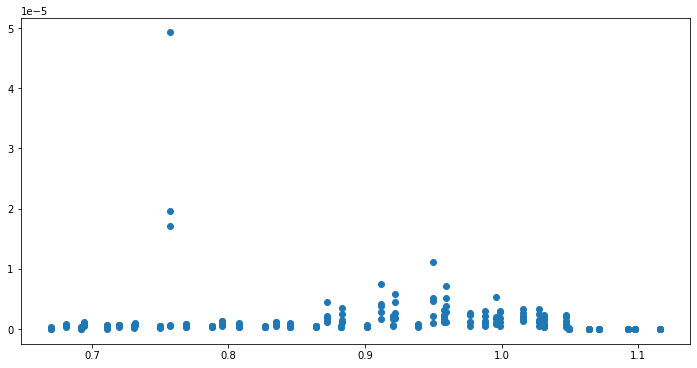

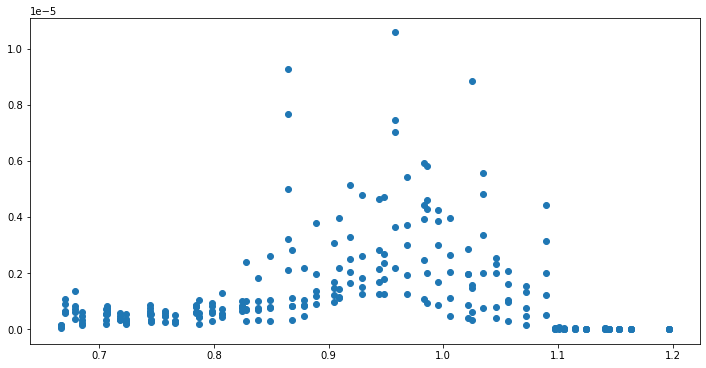

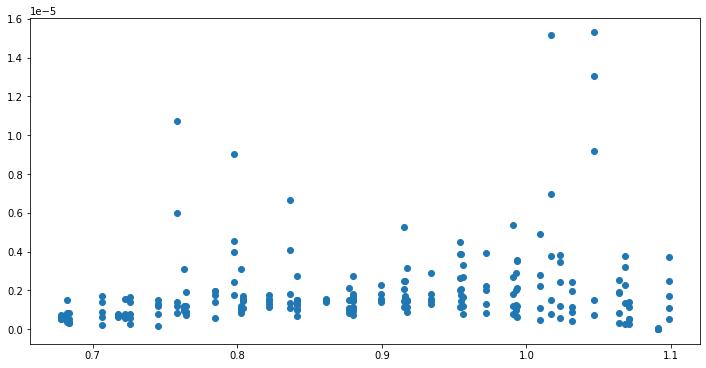

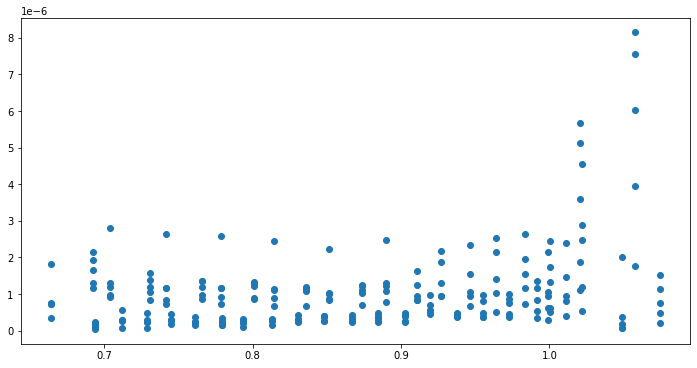

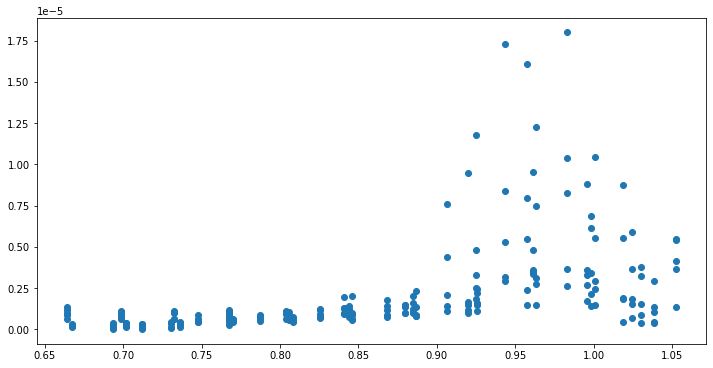

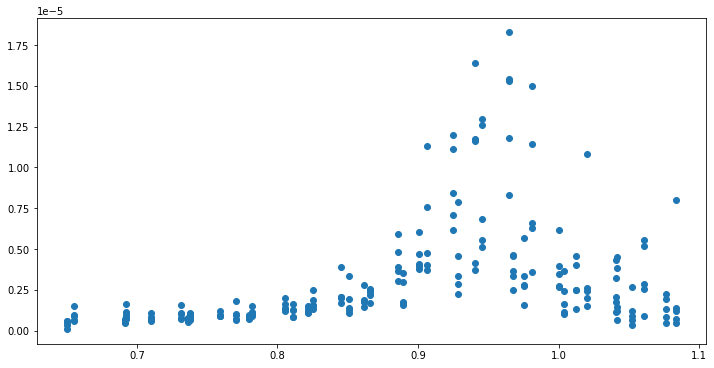

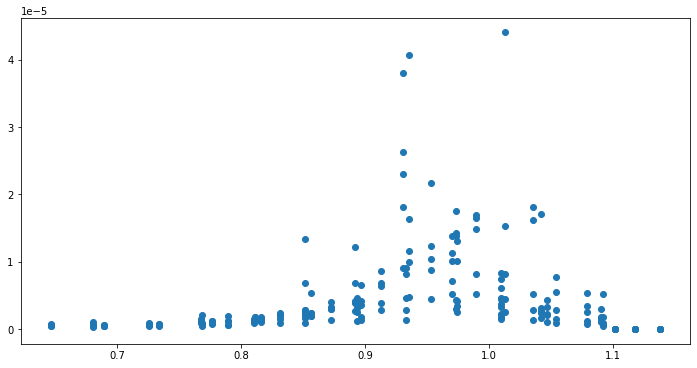

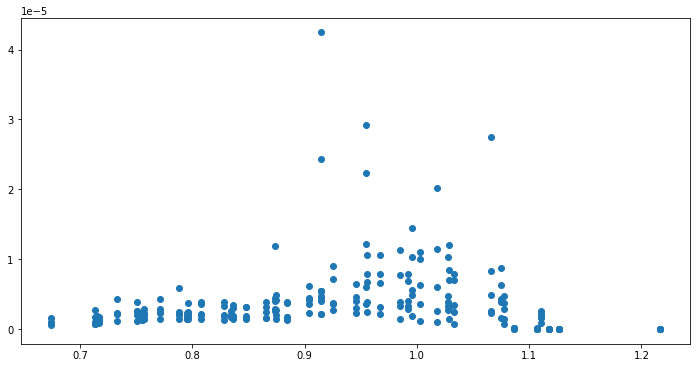

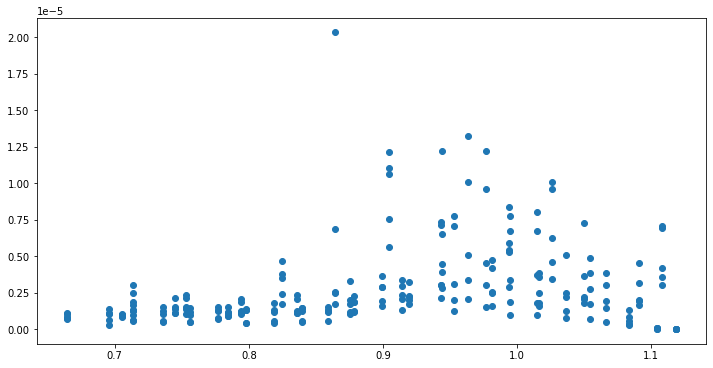

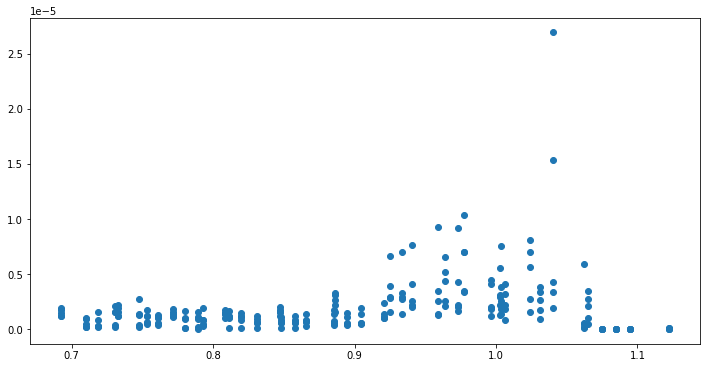

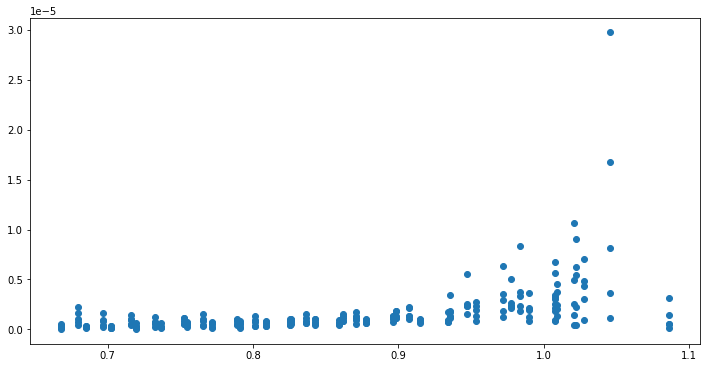

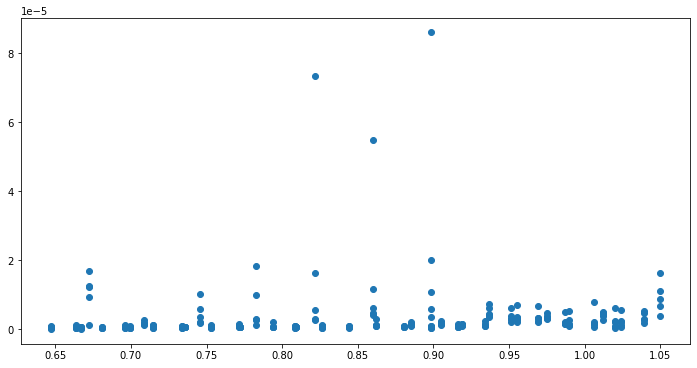

In [203]:
"""sheetwise mse to options strike graphs"""

def to_scatter(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(df['strike_to_price'], df['mse'])
    plt.show()


all_obs_df = list(map(lambda x:pd.DataFrame(x),all_obs))
full_df = pd.concat(all_obs_df)

for sheet in full_df['sheet'].unique():
    data = full_df[full_df['sheet'] == sheet]
    to_scatter(data)

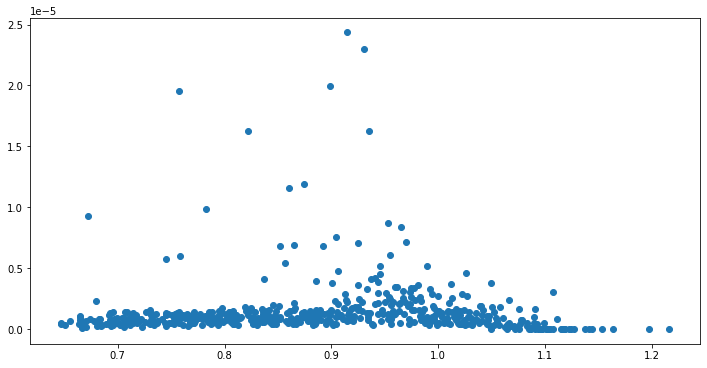

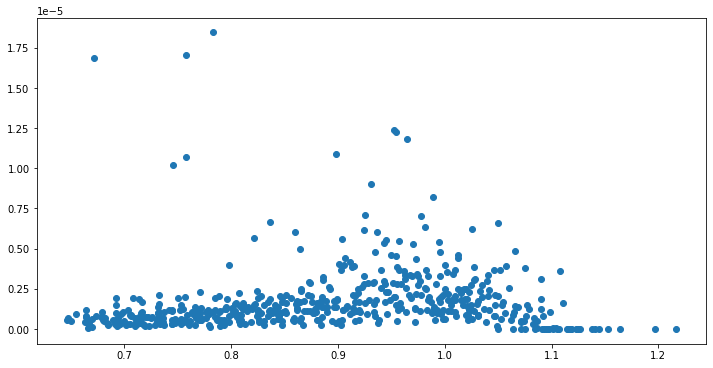

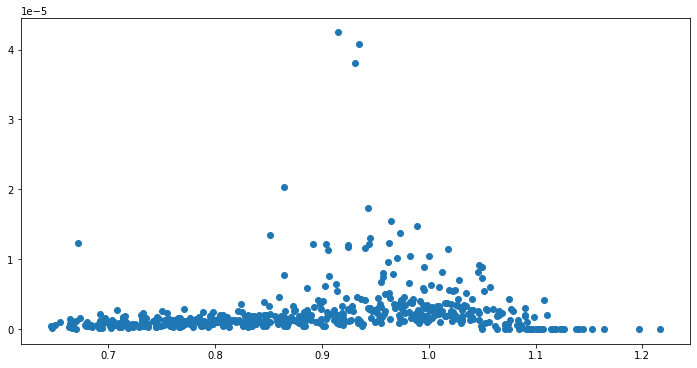

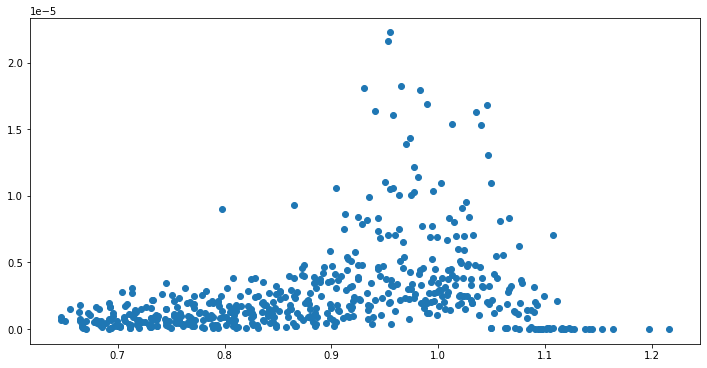

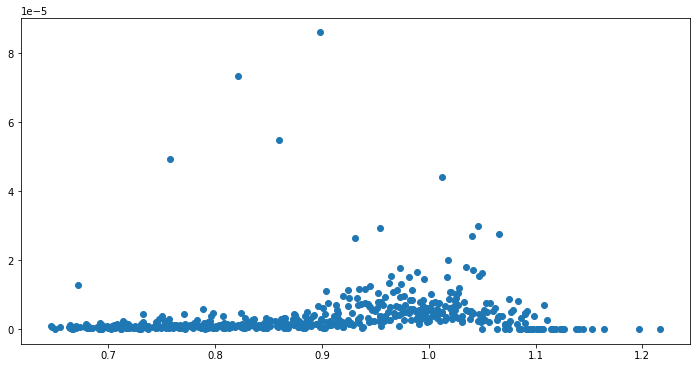

In [204]:
"""rebalancing frequency-wise mse to strike graphs"""

for freq in full_df['freq'].unique():
    data = full_df[full_df['freq'] == freq]
    to_scatter(data)

In [206]:
"""Do a linear regression to find the effect of 
1) hedging frequency on mse
2) strike-to-price ratio on mse
3) controlling for different conditions (or sheets)
"""
X = full_df[['strike_to_price', 'freq', 'sheet']]
y = full_df['mse']

reg = LinearRegression().fit(X,y)

print(reg.score(X,y))
print(reg.coef_)
print(reg.intercept_)
#from sklearn.linear_model import LinearRegression


0.06134067486933581
[5.57847611e-06 5.40820825e-07 4.25229841e-08]
-4.404775409847988e-06


In [212]:
import statsmodels.api as sm

X = full_df[['strike', 'freq', 'sheet']]
y = full_df['mse']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

print(results.params)
print(results.summary())


const    -3.809446e-06
strike    9.607201e-06
freq      5.408208e-07
sheet     4.117059e-08
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mse   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           4.22e-33
Time:                        12:15:35   Log-Likelihood:                 29688.
No. Observations:                2705   AIC:                        -5.937e+04
Df Residuals:                    2701   BIC:                        -5.934e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------